In [3]:
import pandas as pd
import numpy as np

# Part 1 Data Wrangling

In [4]:
#Get a general overview of 2017 data
df_2017 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/2017.csv")
df_2017.head(5)

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,Other.3,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Start Date (UTC),Submit Date (UTC),Network ID
0,e49fe87572831232dcfa51b376b22039,0,100-500,1.0,1.0,No,Yes,No,I don't know,I don't know,...,Female,United Kingdom,NaN,NaN,NaN,United Kingdom,NaN,2018-05-16 12:32:04,2018-05-16 12:42:40,464b7a12f1
1,a1eede444ac024928d247a8372d54931,0,100-500,1.0,1.0,Yes,Yes,No,No,I don't know,...,male,United Kingdom,NaN,NaN,NaN,United Kingdom,NaN,2018-05-16 12:31:13,2018-05-16 12:40:40,464b7a12f1
2,37d3fd67f62bd1e0a2dea4f9cd440d98,0,6-25,1.0,1.0,I don't know,No,I don't know,No,Yes,...,male,United States of America,Missouri,White,NaN,United States of America,Missouri,2018-05-09 05:34:05,2018-05-09 05:46:04,1eb7e0cb94
3,519b759442c1cab0e9b5a8a1acb1b216,0,More than 1000,1.0,1.0,Yes,Yes,I don't know,I don't know,Yes,...,Male,United States of America,Washington,White,NaN,United States of America,Washington,2018-05-04 23:19:14,2018-05-04 23:23:23,63852edbc4
4,ef0af4927b575b1a3e607c11ca37870e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,female,United States of America,Illinois,More than one of the above,NaN,United States of America,Illinois,2018-05-03 00:40:24,2018-05-03 00:53:20,43237889f1


In [5]:
#remove the unnecessary first column
df_2017 = df_2017.drop(df_2017.columns[[0]], axis=1)

In [6]:
#add a column specifying the survey year
df_2017['Survey Year'] = 2017

In [7]:
#get questions we're interested in
df_2017_GQ = df_2017.iloc[:,np.r_[0:6,111:116,117:119,-1]]

In [8]:
#check the resulting dataframe
df_2017_GQ.info(verbose=False)
df_2017_GQ.head(-5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 14 entries, <strong>Are you self-employed?</strong> to Survey Year
dtypes: float64(3), int64(2), object(9)
memory usage: 82.8+ KB


,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Survey Year
0,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,2017
1,0,100-500,1.0,1.0,Yes,Yes,31.0,male,United Kingdom,NaN,NaN,United Kingdom,NaN,2017
2,0,6-25,1.0,1.0,I don't know,No,36.0,male,United States of America,Missouri,White,United States of America,Missouri,2017
3,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,2017
4,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,Illinois,More than one of the above,United States of America,Illinois,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,0,26-100,1.0,1.0,Yes,No,57.0,F,United States of America,Maryland,White,United States of America,Virginia,2017
747,0,More than 1000,1.0,1.0,Yes,Yes,47.0,Male,United States of America,California,White,United States of America,California,2017
748,0,100-500,1.0,1.0,Yes,Yes,34.0,Male,United States of America,Missouri,White,United States of America,Missouri,2017
749,0,26-100,1.0,1.0,Yes,Yes,29.0,Male,United States of America,Maryland,White,United States of America,Maryland,2017


In [9]:
#remove special characters/normalize questions
oldnames_2017 = ('<strong>Are you self-employed?</strong>',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you <strong>live</strong> in?',
       'What US state or territory do you <strong>live</strong> in?',
       'What is your race?', 'What country do you <strong>work</strong> in?',
       'What US state or territory do you <strong>work</strong> in?',
       'Survey Year')
newnames = ('Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?',
       'What US state or territory do you live in?',
       'What is your race?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Survey Year')
df_2017_GQ.rename(columns={i:j for i,j in zip(oldnames_2017,newnames)}, inplace=True)

<ipython-input-9-bcdd0ce5247a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_GQ.rename(columns={i:j for i,j in zip(oldnames_2017,newnames)}, inplace=True)


In [10]:
df_2017_GQ.head(-5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year
0,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,2017
1,0,100-500,1.0,1.0,Yes,Yes,31.0,male,United Kingdom,NaN,NaN,United Kingdom,NaN,2017
2,0,6-25,1.0,1.0,I don't know,No,36.0,male,United States of America,Missouri,White,United States of America,Missouri,2017
3,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,2017
4,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,Illinois,More than one of the above,United States of America,Illinois,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,0,26-100,1.0,1.0,Yes,No,57.0,F,United States of America,Maryland,White,United States of America,Virginia,2017
747,0,More than 1000,1.0,1.0,Yes,Yes,47.0,Male,United States of America,California,White,United States of America,California,2017
748,0,100-500,1.0,1.0,Yes,Yes,34.0,Male,United States of America,Missouri,White,United States of America,Missouri,2017
749,0,26-100,1.0,1.0,Yes,Yes,29.0,Male,United States of America,Maryland,White,United States of America,Maryland,2017


In [11]:
#Get a general overview of 2018 data
df_2018 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/2018.csv")
df_2018.head(5)

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,Other.3,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Start Date (UTC),Submit Date (UTC),Network ID
0,e44a0a34f2465940beda2a1537e9b99e,0,More than 1000,1.0,0.0,Yes,Yes,Yes,Yes,Yes,...,Female,Canada,NaN,NaN,NaN,Canada,NaN,2018-12-29 23:46:38,2018-12-30 00:00:03,4bbb884ccc
1,0d698e3beca20fb75f19b9d528e36d73,0,More than 1000,1.0,1.0,Yes,Yes,No,I don't know,I don't know,...,male,United States of America,Massachusetts,White,NaN,United States of America,Massachusetts,2018-12-27 21:40:40,2018-12-27 21:45:45,275e7543bd
2,61a40c9071eb36fa9caa254d31500c41,0,6-25,0.0,1.0,Yes,Yes,No,No,I don't know,...,Male,United States of America,Florida,White,NaN,United States of America,Florida,2018-12-21 17:37:43,2018-12-21 18:08:01,43994c3dba
3,f8624340bead7deb08abb766704ddf6b,0,6-25,1.0,1.0,No,No,No,No,I don't know,...,male,Norway,NaN,NaN,NaN,Norway,NaN,2018-12-21 16:37:56,2018-12-21 16:44:44,907b3a3faa
4,31d3ae93b68d79e504a0a643601b6b1e,0,26-100,1.0,1.0,Yes,Yes,Yes,Yes,Yes,...,Ostensibly Male,United States of America,Tennessee,White,NaN,United States of America,Tennessee,2018-12-20 19:39:02,2018-12-20 20:58:34,26df20fea3


In [12]:
#remove the unnecessary first column
df_2018 = df_2018.drop(df_2018.columns[[0]], axis=1)

In [13]:
#add a column specifying the survey year
df_2018['Survey Year'] = 2018

In [14]:
#get questions we're interested in
df_2018_GQ = df_2018.iloc[:,np.r_[0:6,111:116,117:119,-1]]

In [15]:
#check the resulting dataframe
df_2018_GQ.info(verbose=False)
df_2018_GQ.head(-5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Columns: 14 entries, <strong>Are you self-employed?</strong> to Survey Year
dtypes: float64(2), int64(3), object(9)
memory usage: 45.7+ KB


,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Survey Year
0,0,More than 1000,1.0,0.0,Yes,Yes,57,Female,Canada,NaN,NaN,Canada,NaN,2018
1,0,More than 1000,1.0,1.0,Yes,Yes,29,male,United States of America,Massachusetts,White,United States of America,Massachusetts,2018
2,0,6-25,0.0,1.0,Yes,Yes,46,Male,United States of America,Florida,White,United States of America,Florida,2018
3,0,6-25,1.0,1.0,No,No,34,male,Norway,NaN,NaN,Norway,NaN,2018
4,0,26-100,1.0,1.0,Yes,Yes,29,Ostensibly Male,United States of America,Tennessee,White,United States of America,Tennessee,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0,1-5,1.0,0.0,Not eligible for coverage / NA,NaN,46,Male,United States of America,Pennsylvania,White,United States of America,Pennsylvania,2018
408,0,More than 1000,1.0,1.0,I don't know,No,31,m,United States of America,Wisconsin,White,United States of America,Wisconsin,2018
409,1,NaN,NaN,NaN,NaN,NaN,35,M,United States of America,Texas,Asian,United States of America,Texas,2018
410,0,100-500,1.0,1.0,Yes,Yes,40,Male,United States of America,Wisconsin,White,United States of America,Wisconsin,2018


In [16]:
#remove special characters/normalize questions
oldnames_2018 = ('<strong>Are you self-employed?</strong>',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you <strong>live</strong> in?',
       'What US state or territory do you <strong>live</strong> in?',
       'What is your race?', 'What country do you <strong>work</strong> in?',
       'What US state or territory do you <strong>work</strong> in?',
       'Survey Year')
newnames = ('Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?',
       'What US state or territory do you live in?',
       'What is your race?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Survey Year')
df_2018_GQ.rename(columns={i:j for i,j in zip(oldnames_2018,newnames)},inplace=True)

<ipython-input-16-981c8291bf7e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_GQ.rename(columns={i:j for i,j in zip(oldnames_2018,newnames)},inplace=True)


In [17]:
df_2018_GQ.head(-5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year
0,0,More than 1000,1.0,0.0,Yes,Yes,57,Female,Canada,NaN,NaN,Canada,NaN,2018
1,0,More than 1000,1.0,1.0,Yes,Yes,29,male,United States of America,Massachusetts,White,United States of America,Massachusetts,2018
2,0,6-25,0.0,1.0,Yes,Yes,46,Male,United States of America,Florida,White,United States of America,Florida,2018
3,0,6-25,1.0,1.0,No,No,34,male,Norway,NaN,NaN,Norway,NaN,2018
4,0,26-100,1.0,1.0,Yes,Yes,29,Ostensibly Male,United States of America,Tennessee,White,United States of America,Tennessee,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0,1-5,1.0,0.0,Not eligible for coverage / NA,NaN,46,Male,United States of America,Pennsylvania,White,United States of America,Pennsylvania,2018
408,0,More than 1000,1.0,1.0,I don't know,No,31,m,United States of America,Wisconsin,White,United States of America,Wisconsin,2018
409,1,NaN,NaN,NaN,NaN,NaN,35,M,United States of America,Texas,Asian,United States of America,Texas,2018
410,0,100-500,1.0,1.0,Yes,Yes,40,Male,United States of America,Wisconsin,White,United States of America,Wisconsin,2018


In [18]:
#Get a general overview of 2019 data
df_2019 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/2019.csv")
df_2019.head(5)

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska


In [19]:
#add a column specifying the survey year
df_2019['Survey Year'] = 2019
df_2019.head(5)

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?,Survey Year
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska,2019
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois,2019
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska,2019


In [20]:
#get questions we're interested in
df_2019_GQ = df_2019.iloc[:,np.r_[0:6,75:83]]

In [21]:
#check the resulting dataframe
df_2019_GQ.info(verbose=False)
df_2019_GQ.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Columns: 14 entries, *Are you self-employed?* to Survey Year
dtypes: bool(1), int64(2), object(11)
memory usage: 36.2+ KB


,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?,Survey Year
0,False,26-100,True,True,I don't know,No,25,Male,United States of America,Nebraska,White,United States of America,Nebraska,2019
1,False,26-100,True,True,Yes,No,51,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
2,False,26-100,True,True,I don't know,No,27,Male,United States of America,Illinois,White,United States of America,Illinois,2019
3,False,100-500,True,True,I don't know,No,37,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
4,False,26-100,True,True,I don't know,No,46,m,United States of America,Nebraska,White,United States of America,Nebraska,2019


In [22]:
#remove special characters/normalize questions
oldnames_2019 = ('*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you *live* in?',
       'What US state or territory do you *live* in?', 'What is your race?',
       'What country do you *work* in?',
       'What US state or territory do you *work* in?', 'Survey Year')
newnames = ('Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?',
       'What US state or territory do you live in?',
       'What is your race?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Survey Year')
df_2019_GQ.rename(columns={i:j for i,j in zip(oldnames_2019,newnames)}, inplace=True)

<ipython-input-22-44907b0b0cd2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_GQ.rename(columns={i:j for i,j in zip(oldnames_2019,newnames)}, inplace=True)


In [23]:
df_2019_GQ.head(-5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year
0,False,26-100,True,True,I don't know,No,25,Male,United States of America,Nebraska,White,United States of America,Nebraska,2019
1,False,26-100,True,True,Yes,No,51,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
2,False,26-100,True,True,I don't know,No,27,Male,United States of America,Illinois,White,United States of America,Illinois,2019
3,False,100-500,True,True,I don't know,No,37,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
4,False,26-100,True,True,I don't know,No,46,m,United States of America,Nebraska,White,United States of America,Nebraska,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,False,26-100,True,True,No,NaN,30,Male,New Zealand,NaN,NaN,New Zealand,NaN,2019
343,True,NaN,NaN,NaN,NaN,NaN,27,Male,United States of America,Colorado,I prefer not to answer,United States of America,Colorado,2019
344,False,100-500,True,True,Yes,No,42,Female,United States of America,Texas,White,United States of America,Texas,2019
345,False,26-100,True,True,Yes,No,26,Femile,Brazil,NaN,NaN,Brazil,NaN,2019


In [24]:
#Get a general overview of 2020 data
df_2020 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/2020.csv")
df_2020.head(5)

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?
0,zwrffw6ykfo82ft1twvzwrffw6c6wsfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,45,Male,United States of America,Connecticut,White,NaN,United States of America,Connecticut
1,zhdmhaa8r0125c4zmoi7qzhdmtjrakhm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,24,female,Russia,NaN,NaN,NaN,Russia,NaN
2,x4itwa9hnlw7qke4y5xibx4itwa9yzl5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,mental health should be a law by government.,1,46,Male,India,NaN,NaN,NaN,India,NaN
3,x3v3oimu5pn0043n8x3v3oizaybhwwto,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,25,Female,Canada,NaN,NaN,NaN,Canada,NaN
4,uyp6re7bhnyx6gez09uyp6re72z0e4e4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,1,25,F,Canada,NaN,NaN,NaN,Canada,NaN


In [25]:
#remove the unnecessary first column
#add a column specifying the survey year
df_2020 = df_2020.drop(df_2020.columns[[0]], axis=1)
df_2020['Survey Year'] = 2020

In [26]:
#get questions we're interested in
df_2020_GQ = df_2020.iloc[:,np.r_[0:6,111:116,117:119,-1]]

In [27]:
#check the resulting dataframe
df_2020_GQ.info(verbose=False)
df_2020_GQ.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 14 entries, *Are you self-employed?* to Survey Year
dtypes: float64(2), int64(3), object(9)
memory usage: 19.8+ KB


,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?,Survey Year
0,1,NaN,NaN,NaN,NaN,NaN,45,Male,United States of America,Connecticut,White,United States of America,Connecticut,2020
1,1,NaN,NaN,NaN,NaN,NaN,24,female,Russia,NaN,NaN,Russia,NaN,2020
2,1,NaN,NaN,NaN,NaN,NaN,46,Male,India,NaN,NaN,India,NaN,2020
3,1,NaN,NaN,NaN,NaN,NaN,25,Female,Canada,NaN,NaN,Canada,NaN,2020
4,1,NaN,NaN,NaN,NaN,NaN,25,F,Canada,NaN,NaN,Canada,NaN,2020


In [28]:
#remove special characters/normalize questions
oldnames_2020 = ('*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you *live* in?',
       'What US state or territory do you *live* in?', 'What is your race?',
       'What country do you *work* in?',
       'What US state or territory do you *work* in?', 'Survey Year')
newnames = ('Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?',
       'What US state or territory do you live in?',
       'What is your race?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Survey Year')
df_2020_GQ.rename(columns={i:j for i,j in zip(oldnames_2020,newnames)}, inplace=True)

<ipython-input-28-89926a597b72>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_GQ.rename(columns={i:j for i,j in zip(oldnames_2020,newnames)}, inplace=True)


In [29]:
df_2020_GQ.head(-5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year
0,1,NaN,NaN,NaN,NaN,NaN,45,Male,United States of America,Connecticut,White,United States of America,Connecticut,2020
1,1,NaN,NaN,NaN,NaN,NaN,24,female,Russia,NaN,NaN,Russia,NaN,2020
2,1,NaN,NaN,NaN,NaN,NaN,46,Male,India,NaN,NaN,India,NaN,2020
3,1,NaN,NaN,NaN,NaN,NaN,25,Female,Canada,NaN,NaN,Canada,NaN,2020
4,1,NaN,NaN,NaN,NaN,NaN,25,F,Canada,NaN,NaN,Canada,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0,More than 1000,0.0,1.0,I don't know,NaN,28,F,France,NaN,NaN,France,NaN,2020
171,0,More than 1000,1.0,1.0,Yes,Yes,39,Male,United States of America,Massachusetts,White,United States of America,Massachusetts,2020
172,0,500-1000,0.0,0.0,I don't know,No,20,m,United Kingdom,NaN,NaN,United Kingdom,NaN,2020
173,0,26-100,1.0,1.0,Yes,Yes,40,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,2020


In [30]:
#Get a general overview of 2021 data
df_2021 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/2021.csv")
df_2021.head(5)

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?,Have you been diagnosed with COVID-19?,Start Date (UTC),Submit Date (UTC),Network ID
0,eu6sxt9r6pyxxykpxcqs6r2qeu6sxt9r,0,26-100,1.0,1.0,I don't know,No,No,I don't know,I don't know,...,United States of America,Alaska,White,NaN,United States of America,Alaska,NaN,2021-12-16 20:28:29,2021-12-16 20:36:02,f3adc1b78a
1,mqgsjpmc31k0fuymqgv96vapalozx3q0,0,500-1000,1.0,1.0,Yes,No,Yes,Yes,Yes,...,Brazil,NaN,NaN,NaN,Brazil,NaN,NaN,2021-12-16 13:42:51,2021-12-16 18:44:40,49a51b7ac1
2,fkuijv5hpifz4fusbn1fkuib4ipqt19s,0,100-500,1.0,1.0,Yes,Yes,No,I don't know,I don't know,...,Brazil,NaN,NaN,NaN,Brazil,NaN,NaN,2021-12-16 13:01:19,2021-12-16 13:14:49,f9e26fd31a
3,eb7i5ye61yizgs5veb7i5yyttqp5zwp2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Italy,NaN,NaN,NaN,Italy,NaN,NaN,2021-12-16 08:57:11,2021-12-16 08:59:00,73a0e1b4c5
4,0qoaw3bb3kzbb2oet0qoa3xc3yzdrvva,0,More than 1000,0.0,1.0,Yes,No,Yes,Yes,I don't know,...,Canada,NaN,NaN,NaN,Canada,NaN,NaN,2021-12-08 14:35:27,2021-12-08 14:44:10,bade27e84d


In [31]:
#remove the unnecessary first column
#add a column specifying the survey year
df_2021 = df_2021.drop(df_2021.columns[[0]],axis=1)
df_2021['Survey Year'] = 2021

In [32]:
#get questions we're interested in
df_2021_GQ = df_2021.iloc[:,np.r_[0:6,111:116,117:119,-1]]

In [33]:
df_2021_GQ.info(verbose=False)
df_2021_GQ.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Columns: 14 entries, *Are you self-employed?* to Survey Year
dtypes: float64(2), int64(3), object(9)
memory usage: 14.5+ KB


,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?,Survey Year
0,0,26-100,1.0,1.0,I don't know,No,28,Female,United States of America,Alaska,White,United States of America,Alaska,2021
1,0,500-1000,1.0,1.0,Yes,No,41,male,Brazil,NaN,NaN,Brazil,NaN,2021
2,0,100-500,1.0,1.0,Yes,Yes,35,Male,Brazil,NaN,NaN,Brazil,NaN,2021
3,1,NaN,NaN,NaN,NaN,NaN,20,male,Italy,NaN,NaN,Italy,NaN,2021
4,0,More than 1000,0.0,1.0,Yes,No,35,female,Canada,NaN,NaN,Canada,NaN,2021


In [34]:
#remove special characters/normalize questions
oldnames_2021 = ('*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you *live* in?',
       'What US state or territory do you *live* in?', 'What is your race?',
       'What country do you *work* in?',
       'What US state or territory do you *work* in?', 'Survey Year')
newnames = ('Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?',
       'What US state or territory do you live in?',
       'What is your race?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Survey Year')
df_2021_GQ.rename(columns={i:j for i,j in zip(oldnames_2021,newnames)}, inplace=True)

<ipython-input-34-980ba035852a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_GQ.rename(columns={i:j for i,j in zip(oldnames_2021,newnames)}, inplace=True)


In [35]:
df_2021_GQ.head(-5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year
0,0,26-100,1.0,1.0,I don't know,No,28,Female,United States of America,Alaska,White,United States of America,Alaska,2021
1,0,500-1000,1.0,1.0,Yes,No,41,male,Brazil,NaN,NaN,Brazil,NaN,2021
2,0,100-500,1.0,1.0,Yes,Yes,35,Male,Brazil,NaN,NaN,Brazil,NaN,2021
3,1,NaN,NaN,NaN,NaN,NaN,20,male,Italy,NaN,NaN,Italy,NaN,2021
4,0,More than 1000,0.0,1.0,Yes,No,35,female,Canada,NaN,NaN,Canada,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1,NaN,NaN,NaN,NaN,NaN,23,Male,South Africa,NaN,NaN,South Africa,NaN,2021
122,0,More than 1000,0.0,1.0,Yes,Yes,35,Male,United States of America,Utah,White,United States of America,Utah,2021
123,1,NaN,NaN,NaN,NaN,NaN,34,Male,Netherlands,NaN,NaN,Netherlands,NaN,2021
124,0,6-25,1.0,1.0,Yes,Yes,46,Male,United States of America,Indiana,White,United States of America,Indiana,2021


In [36]:
#concatenate the dataframes of 2017-2021 to get a dataframe of general questions
#of each year
GQ = [df_2017_GQ,df_2018_GQ,df_2019_GQ,df_2020_GQ,df_2021_GQ]
df_General_Questions = pd.concat(GQ,axis=0,join="outer")
df_General_Questions.head(-5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year,Does your employer provide mental health benefits as part of healthcare coverage?
0,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,2017,NaN
1,0,100-500,1.0,1.0,Yes,Yes,31.0,male,United Kingdom,NaN,NaN,United Kingdom,NaN,2017,NaN
2,0,6-25,1.0,1.0,I don't know,No,36.0,male,United States of America,Missouri,White,United States of America,Missouri,2017,NaN
3,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,2017,NaN
4,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,Illinois,More than one of the above,United States of America,Illinois,2017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1,NaN,NaN,NaN,NaN,NaN,23.0,Male,South Africa,NaN,NaN,South Africa,NaN,2021,NaN
122,0,More than 1000,0.0,1.0,NaN,Yes,35.0,Male,United States of America,Utah,White,United States of America,Utah,2021,Yes
123,1,NaN,NaN,NaN,NaN,NaN,34.0,Male,Netherlands,NaN,NaN,Netherlands,NaN,2021,NaN
124,0,6-25,1.0,1.0,NaN,Yes,46.0,Male,United States of America,Indiana,White,United States of America,Indiana,2021,Yes


In [37]:
#adjust the position of the column "survey year"
df_General_Questions.insert(0,'Survey Year',df_General_Questions.pop('Survey Year'))
df_General_Questions = df_General_Questions.drop(df_General_Questions.columns[[-1]], axis=1)

In [38]:
df_General_Questions.head(-5)

,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?
0,2017,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN
1,2017,0,100-500,1.0,1.0,Yes,Yes,31.0,male,United Kingdom,NaN,NaN,United Kingdom,NaN
2,2017,0,6-25,1.0,1.0,I don't know,No,36.0,male,United States of America,Missouri,White,United States of America,Missouri
3,2017,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington
4,2017,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,Illinois,More than one of the above,United States of America,Illinois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2021,1,NaN,NaN,NaN,NaN,NaN,23.0,Male,South Africa,NaN,NaN,South Africa,NaN
122,2021,0,More than 1000,0.0,1.0,NaN,Yes,35.0,Male,United States of America,Utah,White,United States of America,Utah
123,2021,1,NaN,NaN,NaN,NaN,NaN,34.0,Male,Netherlands,NaN,NaN,Netherlands,NaN
124,2021,0,6-25,1.0,1.0,NaN,Yes,46.0,Male,United States of America,Indiana,White,United States of America,Indiana


In [39]:
list(df_General_Questions.columns)


['Survey Year',
 'Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'What is your age?',
 'What is your gender?',
 'What country do you live in?',
 'What US state or territory do you live in?',
 'What is your race?',
 'What country do you work in?',
 'What US state or territory do you work in?']

In [40]:
df_General_Questions.to_csv('General_Questions.csv', index=False)

Get Open-Ended Questions We're Interested in

In [41]:
df_2017_SP = df_2017.iloc[:,np.r_[95:99,103:105,108]]
df_2018_SP = df_2018.iloc[:,np.r_[95:99,103:105,108]]
df_2019_SP = df_2019.iloc[:,np.r_[59:63,67:69,72]]
df_2020_SP = df_2020.iloc[:,np.r_[95:99,103:105,108]]
df_2021_SP = df_2021.iloc[:,np.r_[95:99,103:105,108]]

In [42]:
df_2017_SP.columns.values.tolist()

['Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your mental health with a potential employer in an interview?',
 'Why or why not?.1',
 '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']

In [43]:
#remove special characters/normalize questions
oldSP_2017 = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
              'Why or why not?',
              'Would you bring up your mental health with a potential employer in an interview?',
              'Why or why not?.1',
              '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
              'Describe the circumstances of the badly handled or unsupportive response.',
              'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
newSP = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
         'Why or why not_Physical?',
         'Would you bring up your mental health with a potential employer in an interview?',
         'Why or why not_Mental?',
         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
         'Describe the circumstances of the badly handled or unsupportive response.',
         'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
df_2017_SP.rename(columns={i:j for i,j in zip(oldSP_2017,newSP)}, inplace=True)

<ipython-input-43-342193cda526>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_SP.rename(columns={i:j for i,j in zip(oldSP_2017,newSP)}, inplace=True)


In [44]:
df_2018_SP.columns.values.tolist()

['Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your mental health with a potential employer in an interview?',
 'Why or why not?.1',
 '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']

In [45]:
#remove special characters/normalize questions
oldSP_2018 = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
              'Why or why not?',
              'Would you bring up your mental health with a potential employer in an interview?',
              'Why or why not?.1',
              '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
              'Describe the circumstances of the badly handled or unsupportive response.',
              'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
newSP = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
         'Why or why not_Physical?',
         'Would you bring up your mental health with a potential employer in an interview?',
         'Why or why not_Mental?',
         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
         'Describe the circumstances of the badly handled or unsupportive response.',
         'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
df_2018_SP.rename(columns={i:j for i,j in zip(oldSP_2018,newSP)}, inplace=True)

<ipython-input-45-dc1d204694b7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_SP.rename(columns={i:j for i,j in zip(oldSP_2018,newSP)}, inplace=True)


In [46]:
df_2019_SP.columns.values.tolist()

['Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your *mental* health with a potential employer in an interview?',
 'Why or why not?.1',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']

In [47]:
#remove special characters/normalize questions
oldSP_2019 = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
              'Why or why not?',
              'Would you bring up your *mental* health with a potential employer in an interview?',
              'Why or why not?.1',
              'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
              'Describe the circumstances of the badly handled or unsupportive response.',
              'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
newSP = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
         'Why or why not_Physical?',
         'Would you bring up your mental health with a potential employer in an interview?',
         'Why or why not_Mental?',
         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
         'Describe the circumstances of the badly handled or unsupportive response.',
         'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
df_2019_SP.rename(columns={i:j for i,j in zip(oldSP_2019,newSP)}, inplace=True)

<ipython-input-47-e5478e4952e7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_SP.rename(columns={i:j for i,j in zip(oldSP_2019,newSP)}, inplace=True)


In [48]:
df_2020_SP.columns.values.tolist()

['Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your *mental* health with a potential employer in an interview?',
 'Why or why not?.1',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']

In [49]:
#remove special characters/normalize questions
oldSP_2020 = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
              'Why or why not?',
              'Would you bring up your *mental* health with a potential employer in an interview?',
              'Why or why not?.1',
              'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
              'Describe the circumstances of the badly handled or unsupportive response.',
              'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
newSP = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
         'Why or why not_Physical?',
         'Would you bring up your mental health with a potential employer in an interview?',
         'Why or why not_Mental?',
         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
         'Describe the circumstances of the badly handled or unsupportive response.',
         'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
df_2020_SP.rename(columns={i:j for i,j in zip(oldSP_2020,newSP)}, inplace=True)

<ipython-input-49-a764525a8ad5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_SP.rename(columns={i:j for i,j in zip(oldSP_2020,newSP)}, inplace=True)


In [50]:
df_2021_SP.columns.values.tolist()

['Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your *mental* health with a potential employer in an interview?',
 'Why or why not?.1',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']

In [51]:
#remove special characters/normalize questions
oldSP_2021 = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
              'Why or why not?',
              'Would you bring up your *mental* health with a potential employer in an interview?',
              'Why or why not?.1',
              'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
              'Describe the circumstances of the badly handled or unsupportive response.',
              'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
newSP = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
         'Why or why not_Physical?',
         'Would you bring up your mental health with a potential employer in an interview?',
         'Why or why not_Mental?',
         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
         'Describe the circumstances of the badly handled or unsupportive response.',
         'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
df_2021_SP.rename(columns={i:j for i,j in zip(oldSP_2021,newSP)}, inplace=True)

<ipython-input-51-9c38db34c20b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_SP.rename(columns={i:j for i,j in zip(oldSP_2021,newSP)}, inplace=True)


In [52]:
#concatenate the dataframes of 2017-2021 to get a dataframe of specific questions
#of each year
SP = [df_2017_SP,df_2018_SP,df_2019_SP,df_2020_SP,df_2021_SP]
df_SP = pd.concat(SP)
df_SP.head(-5)

,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not_Physical?,Would you bring up your mental health with a potential employer in an interview?,Why or why not_Mental?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Describe the circumstances of the badly handled or unsupportive response.,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.
0,Yes,NaN,No,I'd be worried they wouldn't hire me,"Yes, I experienced",NaN,They don't take it seriously
1,Yes,it may require specific measures to accomodate...,No,mental health issues are stigmatised and misun...,"Yes, I observed","During a discussion about ""mental health first...","raise awareness, talk about it to lessen the s..."
2,Maybe,I will sometimes bring up my psoriasis just as...,No,stigma,"Yes, I experienced",I was suffering depression and I was open abou...,"Education and awareness, statistics, add suppo..."
3,No,Anything that may hurt my chances to be hired ...,No,Might hurt my chances,Maybe/Not sure,NaN,"More support, less burnout and death marches"
4,Maybe,It depends. it's not something you start with ...,No,Don't think it's connected to the job. You do ...,No,NaN,I think tech is more internal and they don't r...
...,...,...,...,...,...,...,...
121,Yes,NaN,Maybe,NaN,I've always been self-employed,NaN,NaN
122,Maybe,If the mental health issue was unable to impac...,Maybe,Same as previous answer,"Yes, I observed",Previous job - leadership mocking the individual,Encourage use of tools that have been proven e...
123,Maybe,"No if it's irrelevant, yes if it's visible/rel...",Maybe,"No if it's irrelevant, yes if it's relevant fo...",No,NaN,"Talk withe employees, and create a positive en..."
124,Maybe,Not sure if it is relevant to the job,Maybe,Only if it were relevant to the job,Maybe/Not sure,NaN,Offer or let folks know that there are mental ...


In [53]:
df_SP.to_csv('Specific Questions.csv', index=False)

In [54]:
df = pd.concat([df_General_Questions, df_SP],axis=1)
print(df.info(verbose = False))
df.head(-5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 130
Columns: 21 entries, Survey Year to Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.
dtypes: float64(1), int64(2), object(18)
memory usage: 315.6+ KB
None


,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,...,What is your race?,What country do you work in?,What US state or territory do you work in?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not_Physical?,Would you bring up your mental health with a potential employer in an interview?,Why or why not_Mental?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Describe the circumstances of the badly handled or unsupportive response.,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.
0,2017,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,...,NaN,United Kingdom,NaN,Yes,NaN,No,I'd be worried they wouldn't hire me,"Yes, I experienced",NaN,They don't take it seriously
1,2017,0,100-500,1.0,1.0,Yes,Yes,31.0,male,United Kingdom,...,NaN,United Kingdom,NaN,Yes,it may require specific measures to accomodate...,No,mental health issues are stigmatised and misun...,"Yes, I observed","During a discussion about ""mental health first...","raise awareness, talk about it to lessen the s..."
2,2017,0,6-25,1.0,1.0,I don't know,No,36.0,male,United States of America,...,White,United States of America,Missouri,Maybe,I will sometimes bring up my psoriasis just as...,No,stigma,"Yes, I experienced",I was suffering depression and I was open abou...,"Education and awareness, statistics, add suppo..."
3,2017,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,...,White,United States of America,Washington,No,Anything that may hurt my chances to be hired ...,No,Might hurt my chances,Maybe/Not sure,NaN,"More support, less burnout and death marches"
4,2017,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,...,More than one of the above,United States of America,Illinois,Maybe,It depends. it's not something you start with ...,No,Don't think it's connected to the job. You do ...,No,NaN,I think tech is more internal and they don't r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2021,1,NaN,NaN,NaN,NaN,NaN,23.0,Male,South Africa,...,NaN,South Africa,NaN,Yes,NaN,Maybe,NaN,I've always been self-employed,NaN,NaN
122,2021,0,More than 1000,0.0,1.0,NaN,Yes,35.0,Male,United States of America,...,White,United States of America,Utah,Maybe,If the mental health issue was unable to impac...,Maybe,Same as previous answer,"Yes, I observed",Previous job - leadership mocking the individual,Encourage use of tools that have been proven e...
123,2021,1,NaN,NaN,NaN,NaN,NaN,34.0,Male,Netherlands,...,NaN,Netherlands,NaN,Maybe,"No if it's irrelevant, yes if it's visible/rel...",Maybe,"No if it's irrelevant, yes if it's relevant fo...",No,NaN,"Talk withe employees, and create a positive en..."
124,2021,0,6-25,1.0,1.0,NaN,Yes,46.0,Male,United States of America,...,White,United States of America,Indiana,Maybe,Not sure if it is relevant to the job,Maybe,Only if it were relevant to the job,Maybe/Not sure,NaN,Offer or let folks know that there are mental ...


In [63]:
df.iloc[:,14:16]

,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not_Physical?
0,Yes,NaN
1,Yes,it may require specific measures to accomodate...
2,Maybe,I will sometimes bring up my psoriasis just as...
3,No,Anything that may hurt my chances to be hired ...
4,Maybe,It depends. it's not something you start with ...
...,...,...
126,Maybe,"Of course, if we are talking about a physical ..."
127,Maybe,If can affect by future work and don't know ho...
128,No,NaN
129,No,It will impact on the job


In [481]:
#list all unique values in the column of "what's your gender"
df['What is your gender?'].unique()

array(['Female', 'male', 'Male', 'female', 'F', 'M', 'Man', nan, 'f',
       'Genderfluid', 'Nonbinary', 'Female ', 'cis-male', 'Mail', 'Woman',
       'male/androgynous ', 'cis hetero male', 'm', 'femalw', 'femail',
       'Male (cis)', 'uhhhhhhhhh fem genderqueer?',
       "male (hey this is the tech industry you're talking about)",
       'female (cis)', 'God King of the Valajar', 'Cis male', 'man',
       'My sex is female.', 'Cis-male', 'Male ', 'Non-binary',
       'Male, cis', 'cis male ', 'Agender/genderfluid', 'Male-ish',
       'woman', 'sometimes', 'female (cisgender)', 'Female (cis) ',
       'Woman-identified', 'Contextual', 'Non binary',
       'Genderqueer demigirl', 'Genderqueer/non-binary', 'cis-Female',
       'cis female', 'nonbinary', 'F, cisgender', 'Female-ish', '\\-',
       'trans woman', 'Transfeminine', 'None', 'Cis Male', 'dude',
       'Ostensibly Male', 'Agender', 'male, born with xy chromosoms',
       'Malel', 'MALE', 'I identify as female', '*shrug emoji

# Part 2 Data Cleansing (General Questions)

In [389]:
#check the unique values of all columns
#reference: https://stackoverflow.com/questions/27241253/print-the-unique-values-in-every-column-in-a-pandas-dataframe
for col in df_General_Questions:
    print(df_General_Questions[col].unique())   

[2017 2018 2019 2020 2021]
[0 1]
['100-500' '6-25' 'More than 1000' nan '26-100' '1-5' '500-1000']
[1.0 nan 0.0]
[1.0 nan 0.0]
['No' 'Yes' "I don't know" nan 'Not eligible for coverage / NA']
['Yes' 'No' nan]
[ 27.  31.  36.  22.  52.  30.  38.  35.  40.  23.  34.  28.  53.  21.
  18.  37.  25.  33.  66.  32.  46.  29.  39.  42.  43.  47.  64.  45.
  54.  61.  26.  44.  50.  24.  57.  48.  41.  20.  49.  62.  51.  60.
  58.  59.  67.  56.  55.  nan  19.  65.   0.  63.   5.   1.  11. 223.]
['Female' 'male' 'Male' 'female' 'F' 'M' 'Man' nan 'f' 'Genderfluid'
 'Nonbinary' 'Female ' 'cis-male' 'Mail' 'Woman' 'male/androgynous '
 'cis hetero male' 'm' 'femalw' 'femail' 'Male (cis)'
 'uhhhhhhhhh fem genderqueer?'
 "male (hey this is the tech industry you're talking about)"
 'female (cis)' 'God King of the Valajar' 'Cis male' 'man'
 'My sex is female.' 'Cis-male' 'Male ' 'Non-binary' 'Male, cis'
 'cis male ' 'Agender/genderfluid' 'Male-ish' 'woman' 'sometimes'
 'female (cisgender)' 'Female (c

In [390]:
#Tidy up the answers to "whether or not tech industry"
df['Is your employer primarily a tech company/organization?'].unique()

array([1.0, nan, 0.0], dtype=object)

In [391]:
df = df[df['Is your employer primarily a tech company/organization?'].notna()]

In [392]:
##Tidy up the answers to "whether or not tech role"
df['Is your primary role within your company related to tech/IT?'].unique()

array([1.0, 0.0], dtype=object)

In [393]:
df = df[df['Is your primary role within your company related to tech/IT?'].notna()]

In [ ]:
#list all unique values in the column of "what's your gender"
df[col].unique()

In [394]:
#check the answers of "what's your gender"
GF = ['Female','female','F','f','Female ','Woman','femalw','femail',
      'female (cis)','My sex is female.','woman','female (cisgender)',
      'Female (cis) ','Woman-identified','cis-Female','cis female',
      'F, cisgender','Female-ish','I identify as female','*shrug emoji* (F)',
      'Cis woman','Female (cisgender)','Cis-Female','Cisgendered woman','She/her/they/them',
      'Cis female ','cisgender female','Female-identified','cis woman','femmina',
      'Femile','Female (cis)','FEMALE','female, she/her']
GM = ['male','Male','M','Man','cis-male','Mail','cis hetero male','m',
      'Male (cis)',"male (hey this is the tech industry you're talking about)",
      'Cis male','man','Cis-male','Male ','Male, cis','cis male ','Male-ish',
      'Cis Male','dude','Ostensibly Male','male, born with xy chromosoms','Malel',
      'MALE','cis male','Cisgender male','Let\'s keep it simple and say "male"',
      'Identify as male','Masculine','Cishet male','I have a penis','masculino','Make',
      'CIS Male','mail','mostly male','cisgender male','MAle','male/he/him','cis-het male']

In [395]:
#manipulate the format of gender answer column so it contains only "female","male","other"
for a in df.iloc[:,8]:
    if a in GF:
        df.iloc[:,8] = df.iloc[:,8].replace(a,'Female')
    elif a in GM:
        df.iloc[:,8] = df.iloc[:,8].replace(a,'Male')
    else:
        df.iloc[:,8] = df.iloc[:,8].replace(a,'Other')

In [396]:
df.iloc[:,8].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [328]:
df["What is your gender?"].value_counts(normalize=True)*100

Male      64.299302
Female    31.261890
Other      4.438808
Name: What is your gender?, dtype: float64

In [64]:
df_Q1 = df.iloc[:,np.r_[0:14,14:16]]
df_Q1.to_csv('Q1.csv',index=False)
df_Q1.head(5)

,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not_Physical?
0,2017,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,Yes,NaN
1,2017,0,100-500,1.0,1.0,Yes,Yes,31.0,male,United Kingdom,NaN,NaN,United Kingdom,NaN,Yes,it may require specific measures to accomodate...
2,2017,0,6-25,1.0,1.0,I don't know,No,36.0,male,United States of America,Missouri,White,United States of America,Missouri,Maybe,I will sometimes bring up my psoriasis just as...
3,2017,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,No,Anything that may hurt my chances to be hired ...
4,2017,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,Illinois,More than one of the above,United States of America,Illinois,Maybe,It depends. it's not something you start with ...


# Part 3: Topic Modeling and Data Analysis

In [89]:
df.columns.values.tolist()

['Survey Year',
 'Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'What is your age?',
 'What is your gender?',
 'What country do you live in?',
 'What US state or territory do you live in?',
 'What is your race?',
 'What country do you work in?',
 'What US state or territory do you work in?',
 'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not_Physical?',
 'Would you bring up your mental health with a potential employer in an interview?',
 'Why or why not_Mental?',
 'Have you observed or experienced an unsupportive or badly handled response to a mental health is

In [66]:
#Topic Modeling:https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/ 

In [90]:
df.iloc[:,14].unique()

array(['Yes', 'Maybe', 'No'], dtype=object)

In [91]:
df.iloc[:,14].value_counts(normalize=True)*100

Maybe    41.122004
No       35.403050
Yes      23.474946
Name: Would you be willing to bring up a physical health issue with a potential employer in an interview?, dtype: float64

<AxesSubplot:>

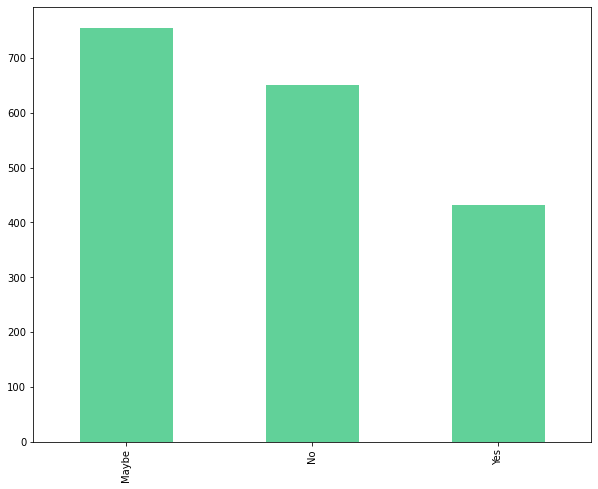

In [92]:
df.iloc[:,14].value_counts().plot(kind="bar", figsize=(10,8), color='#61d199')

In [93]:
#Q1.1: Yes to "Bring up Physical Health Issue"
df_Q1_Y = df.loc[df['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] == 'Yes','Why or why not_Physical?']
print('length of df: ',len(df_Q1_Y))
print('number of missing value: ', df_Q1_Y.isnull().sum())
df_Q1_Y_mod = df_Q1_Y.dropna()
print('length of df after dropping missing values: ',len(df_Q1_Y_mod))

length of df:  431
number of missing value:  103
length of df after dropping missing values:  328


In [94]:
Q1_Y = df_Q1_Y_mod.tolist()
Q1_Y

['it may require specific measures to accomodate my needs',
 'I am not ashamed of it',
 'its need to live',
 "If it's relevant to the work - of course.i would be honest. ",
 "I would bring up the issue of physical health because a) it's visible anyway, b) I want them to know my circumstances and that they are willing to employ me irrespective of them",
 'Honesty. ',
 'Little to no stigma attached to physical health issues.',
 'It may require special arrangements to be made or could possibly affect my ability to do my job if not handled properly.',
 "to determine if I'm adequate candidate and if so if their health insurance would cover some costs associated w/ treatment",
 'Minimal stigma attached.',
 'Physical Limitations',
 "It's more accepted",
 'Because they may need to know in order for me to be an effective employee',
 'Because it may interfer with work',
 'I would bring it up if I felt it were relevant to the position or would have some impact on my work arrangement (e.g., I have

In [95]:
#Q1.2: No to "Bring up Physical Health Issue"
df_Q1_N = df.loc[df['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] == 'No','Why or why not_Physical?']
print('length of df: ',len(df_Q1_N))
print('number of missing value: ', df_Q1_N.isnull().sum())
df_Q1_N_mod = df_Q1_N.dropna()
print('length of df after dropping missing values: ',len(df_Q1_N_mod))

length of df:  650
number of missing value:  132
length of df after dropping missing values:  518


In [96]:
Q1_N = df_Q1_N_mod.tolist()
Q1_N

['Anything that may hurt my chances to be hired is not going to be provided',
 'It seems like it would be a distraction.',
 "I want to maintain my privacy. Unless I end up with a physical health issue that would affect my work, I don't think it's their business",
 'Fear of not getting the job',
 'Fearful of not getting job.  ',
 'You will not get the job if you have anything wrong with you mental or physical. ',
 'I would fear it may bias the interview outcome.',
 'I would not want to be seen as unable to do the work I was interviewing for and be discriminated against.',
 "I don't feel it's important to burden others with a problem that may not effect work efficiency ",
 'It would be an excuse to not hire me.',
 "They don't need to know if I am able to treat the symptoms, and have no negative effect on my work. ",
 'I would be afraid of the lack of support and bias.',
 "I don't have any physical illnesses that would impact upon my work. ",
 'It is not any of their business in an interv

Method 1: Use Gensim that leverages LDA Modeling: Unsupervised ML

In [161]:
#import packages from nltk
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
import gensim
from gensim import corpora

In [99]:
#Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

Topics in "Yes" Answers to Whether to bring up physical Health Issues in Interview

In [176]:
#check the most frequent words in Yes answers of Q1,
#and manually-select them to build a custom stopwords list
NLTK_stopwords = stopwords.words('english')

text = [word for line in Q1_Y for word in line.split() if word not in NLTK_stopwords]
fdist = FreqDist(text)
k = 30
top_k_words, _ = zip(*fdist.most_common(k))
print(top_k_words)

custom_stopwords = ['I', 'would', 'health', 'physical', 'If', 'work', "work",
                    'issues', 'need', 'know', 'issue', "issue",'It', 'job', 
                    'Physical', 'want', 'bring', 'employer', 'might', 
                    'may', 'Because', 'like', 'could',
                    'something', 'mental', 'ability', "I'm", 
                    'important', "It's","le"]

stop = set(NLTK_stop_words + custom_stopwords)

('I', 'would', 'health', 'physical', 'If', 'work', 'issues', 'need', 'know', 'issue', 'It', 'job', 'Physical', 'want', 'bring', 'employer', 'might', 'affect', 'may', 'stigma', 'Because', 'like', 'could', 'impact', 'something', 'mental', 'ability', "I'm", 'important', "It's")


In [177]:
#define a function to remove punctuations and lemmatize words
#stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [180]:
#get a cleaned document
doc_clean_Q1Y = [clean(doc).split() for doc in Q1_Y]

#Creating the term dictionary of our corpus, where every unique term
#is assigned an index
dictionary_Q1Y = corpora.Dictionary(doc_clean_Q1Y)

#Converting list of documents (corpus) into 
#Document-Term Matrix using dictionary prepared above.
doc_term_matrix_Q1Y = [dictionary_Q1Y.doc2bow(doc) for doc in doc_clean_Q1Y]

# Running and Trainign LDA model on the document term matrix.
ldamodel_Q1Y = Lda(doc_term_matrix_Q1Y, num_topics=3, id2word = dictionary_Q1Y, passes=50)

In [181]:
print(ldamodel_Q1Y.print_topics(num_topics=3, num_words=5))

[(0, '0.019*"accommodation" + 0.013*"issue" + 0.012*"le" + 0.012*"impact" + 0.012*"stigma"'), (1, '0.012*"think" + 0.010*"issue" + 0.010*"affect" + 0.009*"im" + 0.009*"need"'), (2, '0.012*"work" + 0.010*"affect" + 0.009*"problem" + 0.008*"them" + 0.008*"thing"')]


Topics in "No" Answers to Whether to bring up physical Health Issues in Interview

In [183]:
#get a cleaned document
doc_clean_Q1N = [set(clean(doc).split()) for doc in Q1_N]

#Creating the term dictionary of our corpus, where every unique term
#is assigned an index
dictionary_Q1N = corpora.Dictionary(doc_clean_Q1N)

#Converting list of documents (corpus) into 
#Document-Term Matrix using dictionary prepared above.
doc_term_matrix_Q1N = [dictionary_Q1N.doc2bow(doc) for doc in doc_clean_Q1N]

# Running and Trainign LDA model on the document term matrix.
ldamodel_Q1N = Lda(doc_term_matrix_Q1N, num_topics=3, id2word = dictionary_Q1N, passes=50)

In [184]:
print(ldamodel_Q1N.print_topics(num_topics=3, num_words=5))

[(0, '0.044*"interview" + 0.033*"business" + 0.018*"none" + 0.015*"unless" + 0.011*"think"'), (1, '0.027*"fear" + 0.024*"discrimination" + 0.017*"hire" + 0.013*"reason" + 0.013*"bias"'), (2, '0.033*"job" + 0.026*"relevant" + 0.020*"feel" + 0.020*"chance" + 0.016*"affect"')]


Topics in "Yes" Answers to Whether to bring up mental Health Issues in Interview

In [83]:
#Q2.1: Yes to "Bring up Mental Health Issue"
df_Q2_Y = df.loc[df['Would you bring up your mental health with a potential employer in an interview?'] == 'Yes','Why or why not_Mental?']
print('length of df: ',len(df_Q2_Y))
print('number of missing value: ', df_Q2_Y.isnull().sum())
df_Q2_Y_mod = df_Q2_Y.dropna()
print('length of df after dropping missing values: ',len(df_Q2_Y_mod))
Q2_Y = df_Q2_Y_mod.tolist()

length of df:  108
number of missing value:  24
length of df after dropping missing values:  84


In [84]:
#get a cleaned document
doc_clean_Q2Y = [clean(doc).split() for doc in Q2_Y]

#Creating the term dictionary of our corpus, where every unique term
#is assigned an index
dictionary_Q2Y = corpora.Dictionary(doc_clean_Q2Y)

#Converting list of documents (corpus) into 
#Document-Term Matrix using dictionary prepared above.
doc_term_matrix_Q2Y = [dictionary_Q2Y.doc2bow(doc) for doc in doc_clean_Q2Y]

# Running and Trainign LDA model on the document term matrix.
ldamodel_Q2Y = Lda(doc_term_matrix_Q2Y, num_topics=5, id2word = dictionary_Q2Y, passes=50)

In [85]:
print(ldamodel_Q2Y.print_topics(num_topics=3, num_words=5))

[(0, '0.020*"like" + 0.017*"part" + 0.017*"bring" + 0.014*"time" + 0.014*"employer"'), (3, '0.023*"could" + 0.022*"affect" + 0.017*"ability" + 0.012*"time" + 0.012*"interview"'), (2, '0.033*"work" + 0.017*"want" + 0.017*"im" + 0.013*"side" + 0.013*"employer"')]


Topics in "No" Answers to Whether to bring up mental Health Issues in Interview

In [86]:
#Q2.2: No to "Bring up Physical Mental Issue"
df_Q2_N = df.loc[df['Would you bring up your mental health with a potential employer in an interview?'] == 'No','Why or why not_Mental?']
print('length of df: ',len(df_Q2_N))
print('number of missing value: ', df_Q2_N.isnull().sum())
df_Q2_N_mod = df_Q2_N.dropna()
print('length of df after dropping missing values: ',len(df_Q2_N_mod))
Q2_N = df_Q2_N_mod.tolist()

length of df:  1257
number of missing value:  244
length of df after dropping missing values:  1013


In [87]:
#get a cleaned document
doc_clean_Q2N = [clean(doc).split() for doc in Q2_N]

#Creating the term dictionary of our corpus, where every unique term
#is assigned an index
dictionary_Q2N = corpora.Dictionary(doc_clean_Q2N)

#Converting list of documents (corpus) into 
#Document-Term Matrix using dictionary prepared above.
doc_term_matrix_Q2N = [dictionary_Q2N.doc2bow(doc) for doc in doc_clean_Q2N]

# Running and Trainign LDA model on the document term matrix.
ldamodel_Q2N = Lda(doc_term_matrix_Q2N, num_topics=5, id2word = dictionary_Q2N, passes=50)

# Descriptive Analysis

In [196]:
#remove the unnecessary first column
df_2017 = df_2017.drop(df_2017.columns[[0]], axis=1)

In [44]:
df_General_Questions.iloc[:,3].value_counts(normalize=True)*100

1.0    72.669626
0.0    27.330374
Name: Is your employer primarily a tech company/organization?, dtype: float64

In [45]:
df_General_Questions.iloc[:,4].value_counts(normalize=True)*100

1.0    92.771084
0.0     7.228916
Name: Is your primary role within your company related to tech/IT?, dtype: float64

In [80]:
df_General_Questions["What is your race?"].value_counts(normalize=True)*100

White                               86.830154
Asian                                4.995459
More than one of the above           3.360581
I prefer not to answer               2.724796
Black or African American            1.634877
American Indian or Alaska Native     0.090827
Hispanic                             0.090827
White Hispanic                       0.090827
European American                    0.090827
Caucasian                            0.090827
Name: What is your race?, dtype: float64

In [81]:
df_General_Questions["What country do you work in?"].value_counts(normalize=True)*100

United States of America    61.995638
United Kingdom               6.870229
India                        4.525627
Canada                       3.326063
Germany                      2.453653
                              ...    
Swaziland                    0.054526
Eritrea                      0.054526
Hungary                      0.054526
Jordan                       0.054526
China                        0.054526
Name: What country do you work in?, Length: 75, dtype: float64

BerTopic is a topic modeling technique that uses transformers (BERT embeddings) and class-based TF-IDF to create dense clusters. It also allows you to easily interpret and visualize the topics generated.                                                            

In [89]:
#pip install bertopic

In [90]:
#pip install bertopic[visualization]

In [91]:
from bertopic import BERTopic

In [100]:
df_Q3 = df.iloc[:,np.r_[0:14,-1]]
print(df_Q3.info(verbose=False))
df_Q3.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 130
Columns: 15 entries, Survey Year to Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.
dtypes: float64(1), int64(2), object(12)
memory usage: 294.0+ KB
None


,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.
0,2017,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,They don't take it seriously
1,2017,0,100-500,1.0,1.0,Yes,Yes,31.0,Male,United Kingdom,NaN,NaN,United Kingdom,NaN,"raise awareness, talk about it to lessen the s..."
2,2017,0,6-25,1.0,1.0,I don't know,No,36.0,Male,United States of America,Missouri,White,United States of America,Missouri,"Education and awareness, statistics, add suppo..."
3,2017,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,"More support, less burnout and death marches"
4,2017,1,NaN,NaN,NaN,NaN,NaN,52.0,Female,United States of America,Illinois,More than one of the above,United States of America,Illinois,I think tech is more internal and they don't r...


In [111]:
Q3 = df_Q3.iloc[:,-1].dropna().tolist()
Q3

["They don't take it seriously",
 'raise awareness, talk about it to lessen the stigma',
 'Education and awareness, statistics, add supportive writing to the company handbook',
 'More support, less burnout and death marches',
 "I think tech is more internal and they don't really talk about feelings or issues.",
 'Awareness, changed work schedules and expectations',
 'Be more vocal about supporting employees with issues, and supporting mental health time off.',
 "I think we over work ourselves and each other. We expect everyone to be connected all the time and humans just weren't meant to work to this degree. We need to cut each other more slack",
 'Don’t know ',
 'ok',
 'Be open about talking about and open about accommodations for it and stop pushing workers toward burnout. ',
 "Make employees more aware of any programs they have options to, STOP firing people that have these problems rather then deal with it. Realize that just because someone might miss a lot of work its not because 

In [ ]:
model = BERTopic(verbose=True)
topics, probabilities = model.fit_transform(Q3)

In [105]:
model.get_topic_freq().head(10)

,Topic,Count
0,0,1181
1,1,44
2,2,43


In [110]:
model.get_topic(0)

[('to', 0.08262546884351898),
 ('and', 0.08036917952920365),
 ('the', 0.07446019717209387),
 ('health', 0.06002633032957318),
 ('of', 0.05970380161310161),
 ('mental', 0.05820411568005753),
 ('it', 0.047918795715885025),
 ('that', 0.04709379222961007),
 ('more', 0.04518584199241943),
 ('be', 0.04307098418606648)]

# Method 3: Targeted TF-IDF topic modeling 

prepare the dataframes for this method

In [171]:
answers_Q1_df = df.iloc[:,0:16]
answers_Q1_df = answers_Q1_df.loc[answers_Q1_df['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] == 'Yes']
answers_Q1_df = answers_Q1_df.loc[answers_Q1_df['Why or why not_Physical?'].notna()]
answers_Q1_df.head(5)
#answers_Q1_df = df_Q5_Y_mod.to_frame()
#answers_Q1_df.iloc[:,0]

,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not_Physical?
1,2017,0,100-500,1,1,Yes,Yes,31.0,Male,United Kingdom,NaN,NaN,United Kingdom,NaN,Yes,it may require specific measures to accomodate...
14,2017,0,26-100,1,0,I don't know,NaN,34.0,Female,United States of America,California,Black or African American,United States of America,California,Yes,I am not ashamed of it
16,2017,0,26-100,0,1,No,No,38.0,Male,Bangladesh,NaN,NaN,Bangladesh,NaN,Yes,its need to live
18,2017,0,6-25,1,1,I don't know,No,21.0,Male,Germany,NaN,NaN,Germany,NaN,Yes,If it's relevant to the work - of course.i wou...
19,2017,0,More than 1000,0,1,I don't know,No,35.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,Yes,I would bring up the issue of physical health ...


#1 Create word bank for topic created.

In [142]:
Characteristic_keyword = ['visible','obvious','see','disability','hide',
                         'body','feature']
Demand_keyword = ['accomondation','devices','special','care','wheelchair',
               'hearing aid','aid']
Concern_keyword = ['discrimination','stigma','matter','issue','chance',
                    'hired','stereotype']

#2 Create Ratios table

In [143]:
term_dictionary = dict()
for keyword in (Characteristic_keyword + Demand_keyword + Concern_keyword):
    term_dictionary[keyword] = sum(answers_Q1_df.iloc[:,-1].str.count(keyword))
    
total_term_count = sum(term_dictionary.values())

ratio_dictionary = dict()
for keyword in (Characteristic_keyword + Demand_keyword + Concern_keyword):
    ratio_dictionary[keyword] = term_dictionary[keyword]/total_term_count
    
Ratios = pd.DataFrame.from_dict(ratio_dictionary, orient = 'index')
Ratios = Ratios.rename(columns = {0: 'Ratios'})
Cha = Ratios.index.isin(Characteristic_keyword)
Ratios['Cha'] = Cha
Dem = Ratios.index.isin(Demand_keyword)
Ratios['Dem'] = Dem
Con = Ratios.index.isin(Concern_keyword)
Ratios['Con'] = Con

In [144]:
Ratios.head(10)

,Ratios,Cha,Dem,Con
visible,NaN,True,False,False
obvious,NaN,True,False,False
see,NaN,True,False,False
disability,NaN,True,False,False
hide,NaN,True,False,False
body,NaN,True,False,False
feature,NaN,True,False,False
accomondation,NaN,False,True,False
devices,NaN,False,True,False
special,NaN,False,True,False


In [158]:
def topic_modeler(answers, Ratios):
    #This function analyzes each sentence in the answers, and assigns a topic distribution to them.
    #The sentiment of the sentence will also be analyzed using Flair package.
    from flair.models import TextClassifier
    from flair.data import Sentence
    import re
    
    #For checking Flair datatype
    def isfloat(value):
      try:
        float(value)
        return True
      except ValueError:
        return False
    sia = TextClassifier.load('en-sentiment')
    
    #Topic Categorizer to be applied on each answer in the dataframe.
    #Return dataframe with each row containing a sentence, sentence topic distribution, and sentence sentiment score
    def topic_categorizer(paragraph):
        #Split paragraph into sentences
        sentence_list = nltk.tokenize.sent_tokenize(paragraph)
        
        #Create Weight list for each topic - we have three topics
        Characteristics_List = []
        Demands_List = []
        Concern_List = []

        #Go through each sentence
        sentence_analyzed = []
        sentence_topics = []
        sentence_sentiment = []
        
        for sentence in sentence_list:   
            #Create dictionary of all counts of keywords in this sentence
            count_dict = dict()
            for keyword in list(Ratios.index):
                counts = sentence.count(keyword)
                if counts > 0:
                    count_dict[keyword] = counts
            
            #Append this count information to your Term-Ratios Dataframe
            #Calculate the Weighted Ratio of each term
             
            topic_list = []
            if count_dict:
                #Pull the TF-IDF Ratios from the Ratios table. This will weigh each matching word accordingly
                sent_df = Ratios.join(pd.DataFrame.from_dict(count_dict, orient = 'index'), how = 'inner')
                sent_df = sent_df.rename(columns = {0: 'Counts'})
                Ratio_sum = ((1/sent_df['Ratios'])*sent_df['Counts']).sum()
                sent_df['Weighted_Ratio'] = (1/(sent_df['Ratios'])*sent_df['Counts'])/Ratio_sum
                
                #Aggregate the terms into the topics specified
                sent_gb = sent_df.groupby(['Cha','Dem','Con'],as_index = False)['Weighted_Ratio'].sum()
                
                #Append these to the original lists
                if sent_gb['Cha'].any() == True:
                    topic_list.append(sent_gb[sent_gb['Cha'] == True].reset_index().iloc[0]['Weighted_Ratio'])
                else:
                    topic_list.append(0)
                if sent_gb['Dem'].any() == True:
                    topic_list.append(sent_gb[sent_gb['Dem'] == True].reset_index().iloc[0]['Weighted_Ratio'])
                else:
                    topic_list.append(0)
                if sent_gb['Con'].any() == True:
                    topic_list.append(sent_gb[sent_gb['Con'] == True].reset_index().iloc[0]['Weighted_Ratio'])
                else:
                    topic_list.append(0)

                #Calculate the Sentiment of the Sentence
                sent = Sentence(sentence)
                sia.predict(sent)
                score = str(sent.labels[0])
                score = score.replace('(',' ').replace(')',' ')
                number = [float(s) for s in score.split() if isfloat(s) is True]
                
                if "POSITIVE" in score:
                    flair_score =  number[0]
                elif "NEGATIVE" in score:
                    flair_score = -number[0]

            #Append all processed data to the lists.
            if topic_list:
                sentence_topics.append(topic_list)
                sentence_analyzed.append(sentence)
                sentence_sentiment.append(flair_score)
                
        return sentence_analyzed, sentence_topics, sentence_sentiment
    
    answer_topic = pd.DataFrame()
    answers['Sentence'], answers['Sentence Topics'], answers['Sentence Sentiment'] = zip(*answers.iloc[:,-1].apply(topic_categorizer))

    return answers


In [159]:
#!pip install --user flair

In [160]:
#conda install pytorch torchvision torchaudio -c pytorch

In [172]:
len(answers_Q1_df)

328

In [174]:
answer_list = np.array_split(answers_Q1_df,100)
flair_list = []
for i in range(0, len(answer_list)):
    flair_answer = topic_modeler(answer_list[i], Ratios)
    flair_list.append(flair_answer)
    
answers_filtered = pd.concat(flair_list)

2022-04-20 11:49:18,494 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt
2022-04-20 11:49:24,069 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt
2022-04-20 11:49:29,729 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:49:35,161 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:49:41,030 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:49:46,510 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:49:51,873 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:49:57,545 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:50:03,318 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:50:09,532 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:50:14,926 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:50:20,566 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:50:25,863 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:50:31,434 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:50:38,353 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:50:45,110 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:50:50,722 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:50:56,336 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:51:02,249 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:51:07,595 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:51:13,027 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:51:21,776 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:51:30,704 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:51:36,261 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:51:41,645 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:51:48,405 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:51:54,051 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt
2022-04-20 11:51:59,451 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt
2022-04-20 11:52:06,837 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:52:13,075 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:52:19,808 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:52:24,967 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:52:31,073 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2022-04-20 11:52:36,403 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt
2022-04-20 11:52:42,478 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt
2022-04-20 11:52:49,342 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: Wrong number of dimensions. values.ndim != ndim [3 != 2]

In [270]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [290]:
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(Q5_Y)

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()

denselist = dense.tolist()

dfQ5Y = pd.DataFrame(denselist, columns=feature_names)

dfQ5Y

,10,100,80,ability,able,ablism,about,absolved,accept,acceptable,...,workplace,workplaces,worse,worst,worth,would,wouldn,yes,you,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.241055,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.124012,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
324,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
325,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0,0.171258,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [226]:
import os
import re

In [70]:
#print out the first rows of answer_processed
result['answer_processed'].head()

0                i'd be worried they wouldn't hire me 
1    mental health issues are stigmatised and misun...
2                                               stigma
3                                might hurt my chances
4    don't think it's connected to the job you do t...
Name: answer_processed, dtype: object

In [66]:
result.iloc[:,15]

0                  I'd be worried they wouldn't hire me 
1      mental health issues are stigmatised and misun...
2                                                 stigma
3                                  Might hurt my chances
4      Don't think it's connected to the job. You do ...
                             ...                        
126    I cannot see the point of bringing it during t...
127    If can affect my work and I don't know how emp...
128                                                  NaN
129                               It will impact the job
130    Because it is taboo and not that much understa...
Name: Why or why not?, Length: 1836, dtype: object

In [68]:
#remove punctuation
result['answer_processed'] = \
result.iloc[:,15].map(lambda x: re.sub('[,\.!?]', '', str(x)))

In [69]:
#convert the titles to lowercase
result['answer_processed'] = \
result['answer_processed'].map(lambda x: x.lower())

In [70]:
#print out the first rows of answer_processed
result['answer_processed'].head()

0                i'd be worried they wouldn't hire me 
1    mental health issues are stigmatised and misun...
2                                               stigma
3                                might hurt my chances
4    don't think it's connected to the job you do t...
Name: answer_processed, dtype: object

In [72]:
from wordcloud import WordCloud

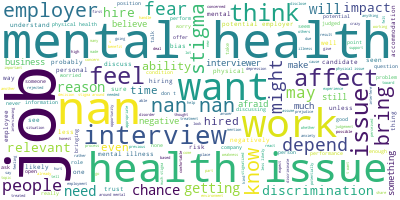

In [73]:
# Join the different processed titles together.
long_string = ','.join(list(result['answer_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [87]:
#reference: https://www.projectpro.io/recipes/add-custom-stopwords-and-then-remove-them-from-text

stopwords = nltk.corpus.stopwords.words('english')

In [88]:
custom_stopwords = ["job","mental health","nan",
                    "health issue","want","work"]

In [89]:
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(custom_stopwords)

In [75]:
result.iloc[:,14].value_counts()

No       1257
Maybe     471
Yes       108
Name: Would you bring up your mental health with a potential employer in an interview?, dtype: int64

In [185]:
df.to_csv('Final Dataframe.csv', index=False)

In [193]:
df_Q2=df.iloc[:,np.r_[0:14,16:18]]
df_Q2.head(5)
df_Q2.to_csv('Q2.csv', index=False)